# Hackathon 1: Online shopper’s intention

The dataset “OnlineIntentionHack1.csv” consists of feature vectors belonging to 12 330 sessions of online shopping on e-commerce website. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. 

The dataset consists of 6 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label and indicates if a transaction was done during the session. "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce.

The raw dataset is available on the Kaggle website and was used in the article “Real-time prediction of online shoppers’ purchasing intention using multilayer perceptron and LSTM recurrent neural networks” of Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018).


## Importation of data & descriptive statistics

Import the the dataset "OnlineIntentionHack1.csv" and store in numpy arrays information about the number of pages per session ("Product Related"), duration of sessions ("Product related Duration"), exit rate and specific special day. You may use read_csv() from the panda library.

In [2]:
import pandas as pd
import numpy as np

#import csv
data = pd.read_csv('OnlineIntentionHack1.csv', ';')

#data to array
prodRelated = np.array(data["ProductRelated"])
prodDuration = np.array(data["ProductRelated_Duration"])
exitRate = np.array(data["ExitRates"])
specialDay = np.array(data["SpecialDay"])

Your study consists in an explanatory analysis of numerical variables and the objectives. 1)	Calculate the mean, variance, median, 25% and 75% quantiles of variables “Product related”, “Product related duration”, “Exit rate”.

In [3]:
import statistics as st

#mean
meanProdRel = st.mean(prodRelated)
meanProdDur = st.mean(prodDuration)
meanExit = st.mean(exitRate)

#median
medianProdRel = st.median(prodRelated)
medianProdDur = st.median(prodDuration)
medianExit = st.median(exitRate)

#variance
varProdRel = st.variance(prodRelated)
varProdDur = st.variance(prodDuration)
varExit = st.variance(exitRate)

#1/4 quantile
quartQuantRel = np.quantile(prodRelated, 0.25)
quartQuantProdDur = np.quantile(prodDuration, 0.25)
quartQuantExit = np.quantile(exitRate, 0.25)

#3/4 quantile
threeQuartQuantRel = np.quantile(prodRelated, 0.75)
threeQuartQuantProdDur = np.quantile(prodDuration, 0.75)
threeQuartQuantExit = np.quantile(exitRate, 0.75)


2)	Draw one graph with three box plots for “Product related”, “Product related duration”, “Exit rate” (hint use subplot(…) to manage different scales). You need to import the library "matplotlib.pyplot". Any outliers?

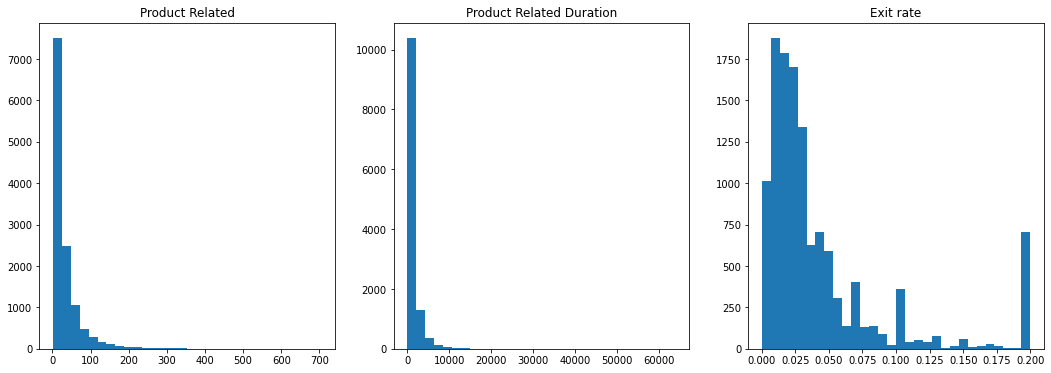

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,6))

plt.subplot(131)
plt.hist(prodRelated, 30)
plt.title("Product Related")

plt.subplot(132)
plt.hist(prodDuration, 30)
plt.title("Product Related Duration")

plt.subplot(133)
plt.hist(exitRate, 30)
plt.title("Exit rate")

plt.show()

Any outliers? Please comment.

3)	Calculate the correlations: “Special day”/“Product related”, “Special day”/ “Product related duration” and “Product related”/“Product related duration”.

4)	Draw two histograms for “Product related”, “Product related duration” in the same plot (hint: subplot(…)).

## Parameter estimation by log-likelihood maximization

5)	Fit the exponential and gamma to the random variable “Product related”. For this exercise, you need to import scipy.stats.

i.	Find their parameter estimates by log-likelihood maximization (hint: set location parameter to zero with floc=0 for both distributions). The location parameter is often redundant and causes numerical unstabilities.

Write 2 functions that calculate the log-likelihoods of the exponential and gamma model. 

Select the best model based on log-likelihoods 

Which model do you select? 

Compare empirical and theoretical distributions. For this purpose, plot an histogram of raw data and add the probability density function (pdf) that you have selected for modelling the random variable.

6)	Based on the content of the “Self-learning 2”, implement the bootstrapping method and find 1000 estimates of parameters (1000 simulations) for the distribution of “Product related” with bootstrapped samples of size 1000 (1000 records). Report the following statistics
i.	The means & variances of parameter estimates 
ii.	The 10%-90% confidence interval.
iii.	Plot a histogram of parameter estimates. 
Hint: use the library random to generate a sample.

7)	Same exercise as 6 but this time you work with bootstrapped samples of size 9000. Compare confidence intervals with the one of point 6). What do you conclude?